In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.3'

In [56]:
np.random.random??

In [19]:
%matplotlib inline

In [20]:
arr = np.random.randint(0, 20, size=(10, 2))
arr[:6]

array([[ 1,  7],
       [ 0, 11],
       [ 7,  8],
       [ 9, 16],
       [14,  5],
       [ 8,  6]])

In [21]:
arr_m = arr + np.array([4, 5])
arr_m[:6]

array([[ 5, 12],
       [ 4, 16],
       [11, 13],
       [13, 21],
       [18, 10],
       [12, 11]])

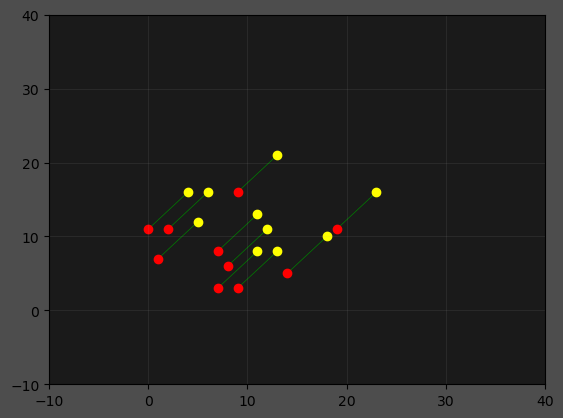

In [22]:
plt.axes().set_facecolor('0.1')
plt.scatter(arr[:, 0], arr[:, 1], c='red')
plt.scatter(arr_m[:, 0], arr_m[:, 1], c='yellow')
for i in range(len(arr)):
    plt.plot([arr[i, 0], arr_m[i, 0]], [arr[i, 1], arr_m[i, 1]],c='green',linewidth=.5, zorder=0)

plt.xlim(-10,40)
plt.ylim(-10,40)
plt.grid(alpha=0.1)
plt.show()

In [23]:
arr2 = np.random.randint(0, 10, size=(20, 3))
arr_m2 = arr2 + np.array([8, 8, 8])
arr2.shape

(20, 3)

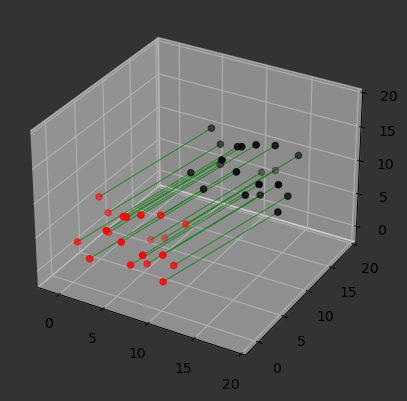

In [24]:
fig = plt.figure()
fig.patch.set_facecolor('0.2')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('0.2')

ax.scatter(arr2[:,0], arr2[:,1], arr2[:,2], c='red')
ax.scatter(arr_m2[:,0], arr_m2[:,1], arr_m2[:,2], c='black')
for i in range(len(arr2)):
    plt.plot([arr2[i, 0], arr_m2[i, 0]], [arr2[i, 1], arr_m2[i, 1]], [arr2[i, 2], arr_m2[i, 2]],c='g',linewidth=.5, zorder=0)

ax.set_xlim(-2, 20)
ax.set_ylim(-2, 20)
ax.set_zlim(-2, 20)
plt.show()    

In [83]:
def _2d_transform(v, M):
    
    v_t = np.dot(M, v)
    #print(v)
    #print(v_t)
    
    plt.figure(figsize=(6,6))
    plt.axes().set_facecolor('0.1')
    plt.scatter(v[0, :], v[1, :], c='red', zorder=2, s=80, alpha=.7)
    plt.scatter(v_t[0, :], v_t[1, :], c='yellow', zorder=2, alpha=.7)
    for i in range(v.shape[1]):
        plt.plot([v[0, i], v_t[0, i]], [v[1, i], v_t[1, i]],c='green',linewidth=.5, zorder=1)

    plt.axhline(y=0, color='black',zorder=0)
    plt.axvline(x=0, color='black',zorder=0)
    #plt.xlim(v_t[0, :].min()-2, v_t[0, :].max()+2)
    #plt.ylim(v_t[1, :].min()-2, v_t[1, :].max()+2)
    plt.grid(alpha=.1)
    plt.show()    

In [84]:
#%matplotlib notebook

In [98]:
M1 = np.array([[ 1,  3],
               [-2,  0]])

M2 = np.array([[ 2, 0],
               [-1, 1]])

M3 = np.array([[ 1, 1],
               [-2, 1]])


basis = np.array([[ 1, 0],
                  [ 0, 1]])

vectors2 = np.c_[np.arange(-10,12, 2), np.arange(-10,12,2)].T
vectors = np.array([[-1, 4, -2,  3,  1,  2,  3, -1],
                    [ 2, 1,  2, -2,  1,  2,  3, -1]])


vectors_t = np.dot(A, vectors)
vectors2_t = np.dot(A, vectors2)

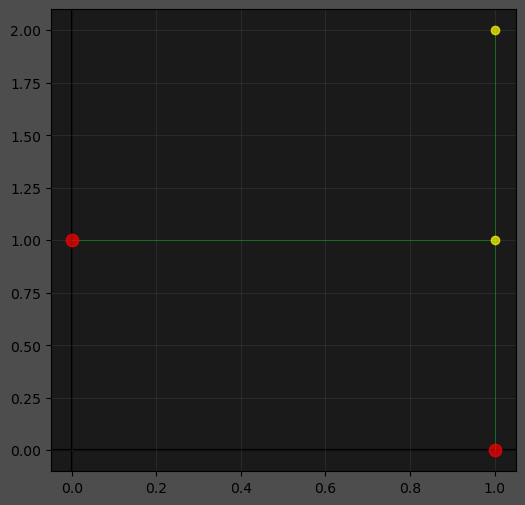

In [90]:
_2d_transform(basis, M3)
#_2d_transform(vectors2, M2)

In [100]:
x = np.arange(-15, 16, 3)
y = np.arange(-15, 16, 3)
X, Y = np.meshgrid(x, y)
coordinates = np.column_stack((X.ravel(), Y.ravel()))
vectors3 = coordinates.T

vectors3_t = np.dot(M3, vectors3)
vectors3_t

array([[-30, -27, -24, -21, -18, -15, -12,  -9,  -6,  -3,   0, -27, -24,
        -21, -18, -15, -12,  -9,  -6,  -3,   0,   3, -24, -21, -18, -15,
        -12,  -9,  -6,  -3,   0,   3,   6, -21, -18, -15, -12,  -9,  -6,
         -3,   0,   3,   6,   9, -18, -15, -12,  -9,  -6,  -3,   0,   3,
          6,   9,  12, -15, -12,  -9,  -6,  -3,   0,   3,   6,   9,  12,
         15, -12,  -9,  -6,  -3,   0,   3,   6,   9,  12,  15,  18,  -9,
         -6,  -3,   0,   3,   6,   9,  12,  15,  18,  21,  -6,  -3,   0,
          3,   6,   9,  12,  15,  18,  21,  24,  -3,   0,   3,   6,   9,
         12,  15,  18,  21,  24,  27,   0,   3,   6,   9,  12,  15,  18,
         21,  24,  27,  30],
       [ 15,   9,   3,  -3,  -9, -15, -21, -27, -33, -39, -45,  18,  12,
          6,   0,  -6, -12, -18, -24, -30, -36, -42,  21,  15,   9,   3,
         -3,  -9, -15, -21, -27, -33, -39,  24,  18,  12,   6,   0,  -6,
        -12, -18, -24, -30, -36,  27,  21,  15,   9,   3,  -3,  -9, -15,
        -21, -27, -33,

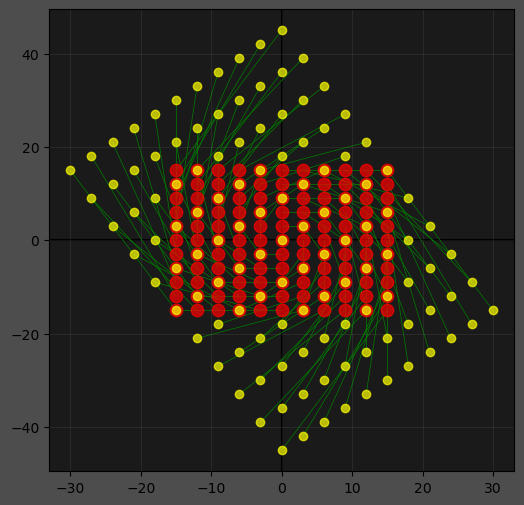

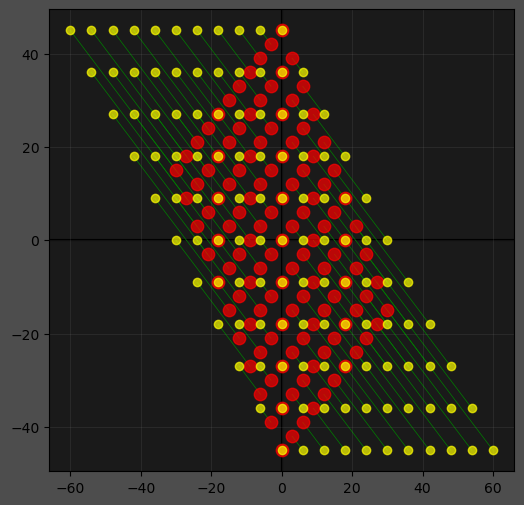

In [101]:
_2d_transform(vectors3, M3)
_2d_transform(vectors3_t, M2)

In [91]:
import math

In [97]:
math.log(81, 3)

4.0